In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [4]:
SACdf = gdf[gdf.Tm == 'SAC']
BRKdf = gdf[gdf.Tm == 'BRK']


In [5]:
SACdf.Date = SACdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
SACdf = SACdf[(SACdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (SACdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

BRKdf.Date = BRKdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
BRKdf = BRKdf[(BRKdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (BRKdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

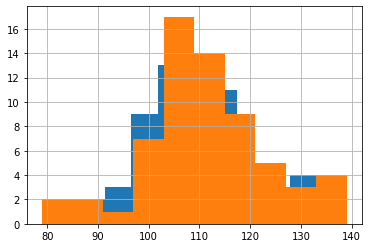

In [6]:
SACdf.TeamPTS.hist()
BRKdf.TeamPTS.hist()

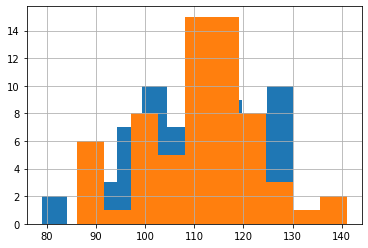

In [7]:
SACdf.OpponentPTS.hist()
BRKdf.OpponentPTS.hist()

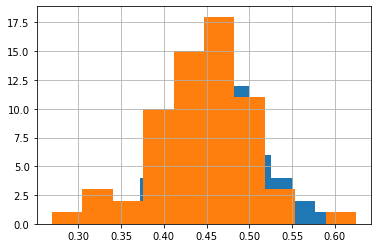

In [8]:
SACdf.TeamFGP.hist()
BRKdf.TeamFGP.hist()

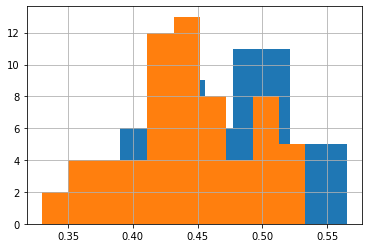

In [9]:
SACdf.OpponentFGP.hist()
BRKdf.OpponentFGP.hist()

In [10]:
SACmeanpts = SACdf.TeamPTS.mean()
BRKmeanpts = BRKdf.TeamPTS.mean()
SACfgp = SACdf.TeamFGP.mean()
BRKfgp = BRKdf.TeamFGP.mean()
SACsdpts = SACdf.TeamPTS.std()
BRKsdpts = BRKdf.TeamPTS.std()

SACmeaBRKp = SACdf.OpponentPTS.mean()
BRKmeaBRKp = BRKdf.OpponentPTS.mean()
SACfgpopp = SACdf.OpponentFGP.mean()
BRKfgpopp = BRKdf.OpponentFGP.mean()
SACsdopp = SACdf.OpponentPTS.std()
BRKsdopp = BRKdf.OpponentPTS.std()

print("SAC Mean ", SACmeanpts)
print("SAC FG% ", SACfgp)
print("SAC Points Standard Deviation ", SACsdpts)
print("BRK Points Mean ", BRKmeanpts)
print("BRK FG% ", BRKfgp)
print("BRK Points Standard Deviation ", BRKsdpts)

print("SAC OppPoints Mean ", SACmeaBRKp)
print("SAC OppFG% Mean ", SACfgpopp)
print("SAC OppPoints SD ", SACsdopp)
print("BRK OppPoints Mean ", BRKmeaBRKp)
print("BRK OppFG% Mean ", BRKfgpopp)
print("BRK OppPoints SD ", BRKsdopp)

SAC Mean  108.984375
SAC FG%  0.46204687499999997
SAC Points Standard Deviation  10.493372341399027
BRK Points Mean  110.765625
BRK FG%  0.44485937500000017
BRK Points Standard Deviation  12.089273991225472
SAC OppPoints Mean  110.90625
SAC OppFG% Mean  0.46865624999999994
SAC OppPoints SD  12.091868906450882
BRK OppPoints Mean  111.40625
BRK OppFG% Mean  0.44284375
BRK OppPoints SD  11.714485335116803


In [11]:
def gameSim():
    SACScore = (rnd.gauss(SACmeanpts,SACsdpts)+ rnd.gauss(BRKmeaBRKp,BRKsdopp))/2
    BRKScore = (rnd.gauss(BRKmeanpts,BRKsdpts)+ rnd.gauss(BRKmeaBRKp,BRKsdopp))/2
    if int(round(SACScore)) > int(round(BRKScore)):
        return 1
    elif int(round(SACScore)) < int(round(BRKScore)):
        return -1
    else: return 0

In [12]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('SAC Win ', team1win/(team1win+team2win),'%')
    print('BRK Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [13]:
gAmesSim(10000)

SAC Win  0.47196600684008705 %
BRK Win  0.528033993159913 %


[-1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1